https://learn.astropy.org/tutorials/PVDiagramPlotting.html

https://chatgpt.com/share/694e7138-0254-8007-a6b1-278970247e62

In [3]:
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import wcs
from spectral_cube import SpectralCube
from pvextractor import extract_pv_slice, Path
from astropy.utils.data import download_file

plt.rcParams["figure.facecolor"] = "w"

In [4]:
url = "http://www.astropy.org/astropy-data/l1448/l1448_13co.fits"
filename = download_file(url, cache=True)

cube = SpectralCube.read(filename)
cube

SpectralCube with shape=(53, 105, 105):
 n_x:    105  type_x: RA---SFL  unit_x: deg    range:    50.924417 deg:   51.740103 deg
 n_y:    105  type_y: DEC--SFL  unit_y: deg    range:    30.301945 deg:   30.966389 deg
 n_s:     53  type_s: VOPT      unit_s: m / s  range:     2528.195 m / s:    5982.223 m / s

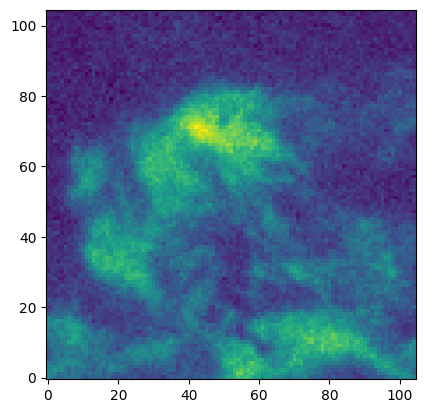

In [5]:
plt.imshow(cube[25].value, origin="lower")

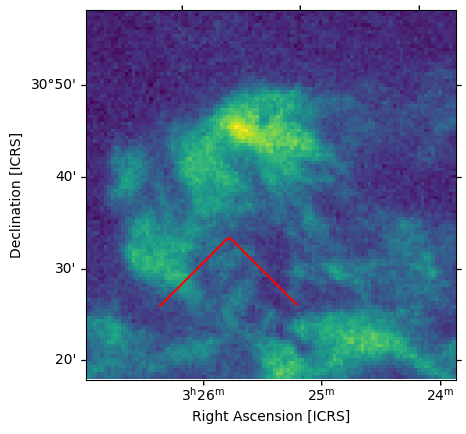

In [6]:
path = Path([(20, 20), (40, 40), (60, 20)])
ax = plt.subplot(111, projection=cube.wcs.celestial)
ax.imshow(cube[25].value)
path.show_on_axis(ax, spacing=1, color="r")
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")

In [7]:
pvdiagram = extract_pv_slice(cube=cube, path=path, spacing=1)
pvdiagram

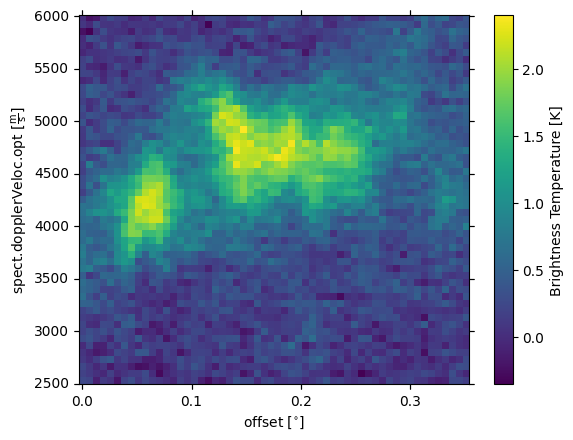

In [8]:
ax = plt.subplot(111, projection=wcs.WCS(pvdiagram.header))
im = ax.imshow(pvdiagram.data)
cb = plt.colorbar(mappable=im)
# we could specify the colorbar units like: cb.set_label(cube.unit)
# but the 'BUNIT' keyword is not set for these data, so we don't know the unit.  We instead manually specify:
cb.set_label("Brightness Temperature [K]")

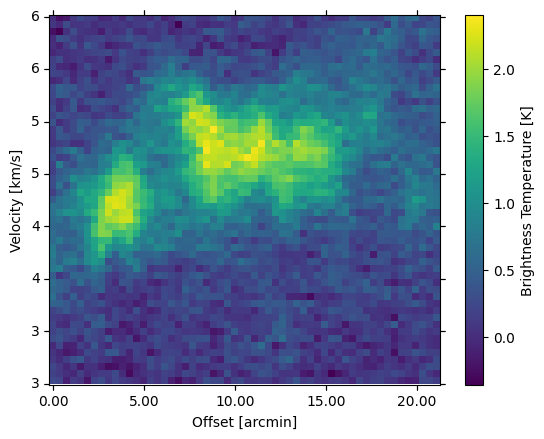

In [9]:
ww = wcs.WCS(pvdiagram.header)

ax = plt.subplot(111, projection=ww)
im = ax.imshow(pvdiagram.data)
cb = plt.colorbar(mappable=im)
cb.set_label("Brightness Temperature [K]")

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km / u.s)

ax.set_ylabel("Velocity [km/s]")
ax.set_xlabel("Offset [arcmin]")

In [10]:
mx = cube.max(axis=0).value

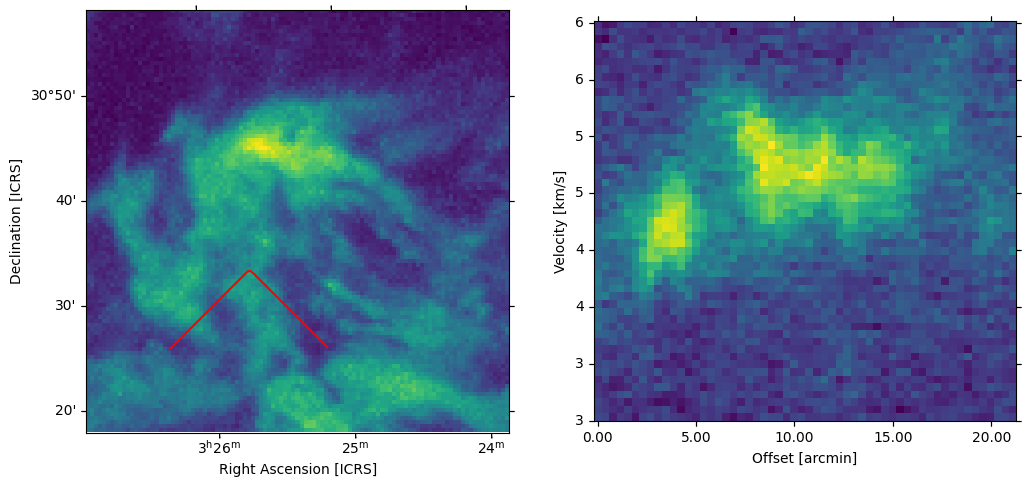

In [11]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(121, projection=cube.wcs.celestial)
ax.imshow(mx)
path.show_on_axis(ax, spacing=1, color="r")

ww = wcs.WCS(pvdiagram.header)
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")

ax = plt.subplot(122, projection=ww)
im = ax.imshow(pvdiagram.data)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km / u.s)

ax.set_ylabel("Velocity [km/s]")
ax.set_xlabel("Offset [arcmin]")

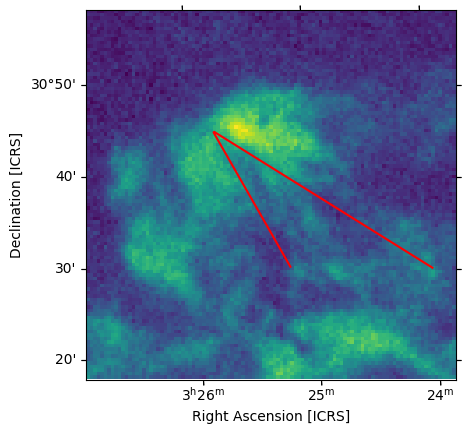

In [13]:
from astropy.coordinates import SkyCoord

skypath = Path(
    SkyCoord([3.4, 3.43, 3.42] * u.h, [30.5, 30.75, 30.5] * u.deg, frame="fk5")
)

ax = plt.subplot(111, projection=cube.wcs.celestial)
ax.imshow(cube[25].value)
skypath.show_on_axis(ax, spacing=1, color="r")
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")

In [14]:
pvdiagram2 = extract_pv_slice(cube=cube, path=skypath)
pvdiagram2

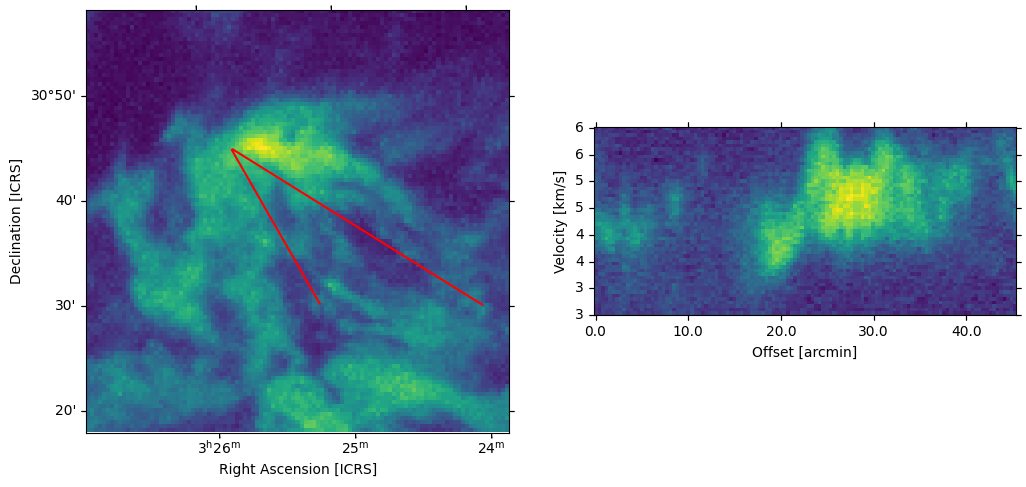

In [17]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(121, projection=cube.wcs.celestial)
ax.imshow(mx)
skypath.show_on_axis(ax, spacing=1, color="r")

ww = wcs.WCS(pvdiagram2.header)
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")

ax = plt.subplot(122, projection=ww)
im = ax.imshow(pvdiagram2.data)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km / u.s)

ax.set_ylabel("Velocity [km/s]")
ax.set_xlabel("Offset [arcmin]")

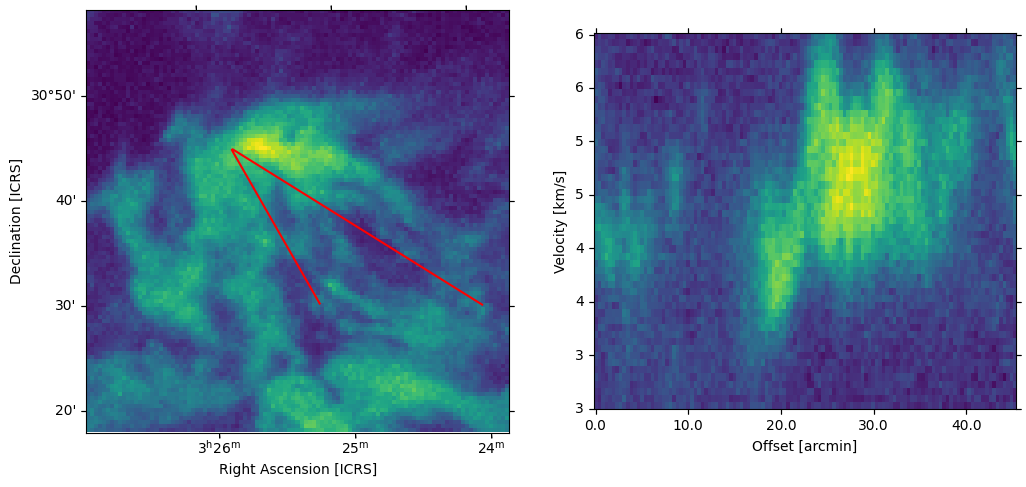

In [18]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(121, projection=cube.wcs.celestial)
ax.imshow(mx)
skypath.show_on_axis(ax, spacing=1, color="r")

ww = wcs.WCS(pvdiagram2.header)
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")


ax = plt.subplot(122, projection=ww)
im = ax.imshow(pvdiagram2.data)
ax.set_aspect(2)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km / u.s)

ax.set_ylabel("Velocity [km/s]")
ax.set_xlabel("Offset [arcmin]")

In [21]:
skypath2 = Path(
    SkyCoord([3.4, 3.429, 3.42] * u.h, [30.5, 30.75, 30.5] * u.deg, frame="fk5"),
    width=2 * u.arcmin,
)

pvdiagram3 = extract_pv_slice(cube=cube, path=skypath2)

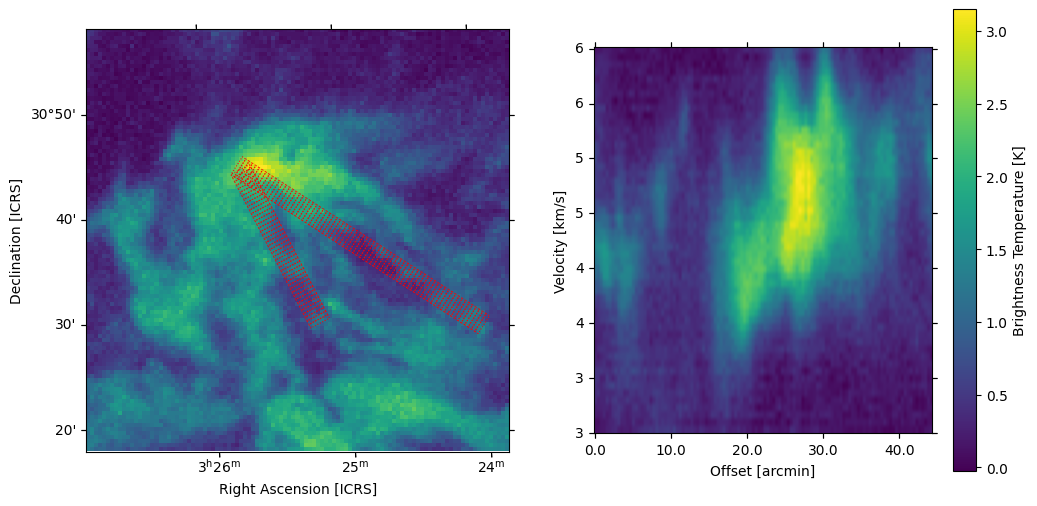

In [22]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(121, projection=cube.wcs.celestial)
ax.imshow(mx)

skypath2.show_on_axis(ax, spacing=1, edgecolor="r", linestyle=":", linewidth=0.75)

ww = wcs.WCS(pvdiagram3.header)
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")

ax = plt.subplot(122, projection=ww)
im = ax.imshow(pvdiagram3.data)
ax.set_aspect(2.5)

cb = plt.colorbar(mappable=im)
cb.set_label("Brightness Temperature [K]")

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km / u.s)


ax.set_ylabel("Velocity [km/s]")
ax.set_xlabel("Offset [arcmin]")

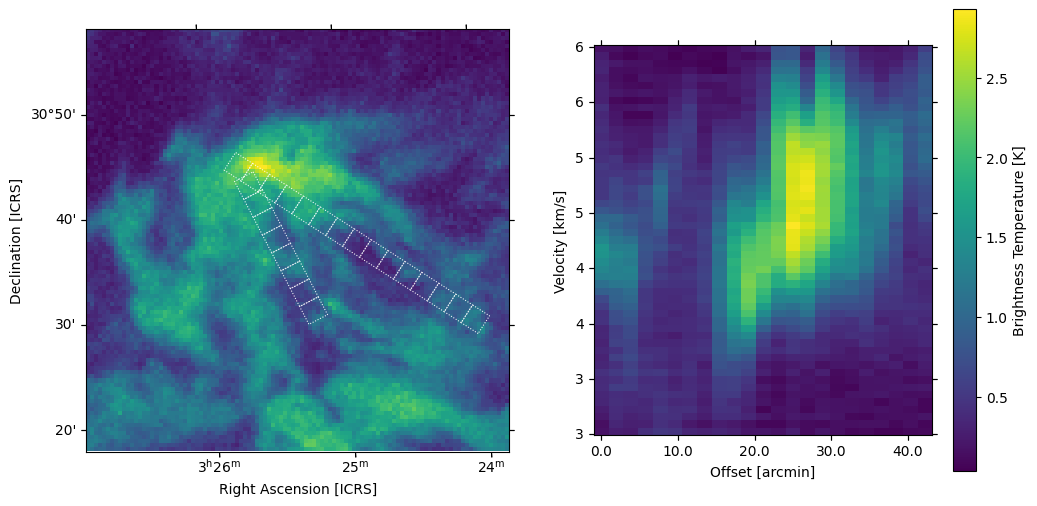

In [27]:
pvdiagram4 = extract_pv_slice(cube=cube, path=skypath2, spacing=5)

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(121, projection=cube.wcs.celestial)
ax.imshow(mx)
skypath2.show_on_axis(ax, spacing=5, edgecolor="w", linestyle=":", linewidth=0.75)

ww = wcs.WCS(pvdiagram4.header)
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]")
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]")

ax = plt.subplot(122, projection=ww)
im = ax.imshow(pvdiagram4.data)
cb = plt.colorbar(mappable=im)
cb.set_label("Brightness Temperature [K]")
ax.set_aspect(0.5)

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcmin)
ax1 = ax.coords[1]
ax1.set_format_unit(u.km / u.s)

ax.set_ylabel("Velocity [km/s]")
ax.set_xlabel("Offset [arcmin]")

In [24]:
pvdiagram.writeto("saved_pvdiagram.fits", overwrite=True)